# 1. Problem Statement  

# 2. Data Gathering 

In [138]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [42]:
data1 = pd.read_csv('dataset\loan.csv')
data1.shape

(67463, 35)

In [43]:
data1.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [44]:
data1['Grade'].nunique()

7

In [45]:
%time data2 = pd.read_csv('dataset\loan1.csv')
data2.shape

Wall time: 1.87 s


(128221, 55)

In [46]:
# %time data2 = pd.read_excel('dataset\loan3.xlsx')
# data2.shape

In [47]:
%time data = pd.read_csv(r'dataset\final_loan.csv')
data.shape

Wall time: 274 ms


(128835, 13)

In [48]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# 3. EDA

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128835 entries, 0 to 128834
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Loan_ID            128835 non-null  object 
 1   Gender             126108 non-null  object 
 2   Married            128205 non-null  object 
 3   Dependents         125688 non-null  object 
 4   Education          128835 non-null  object 
 5   Self_Employed      122120 non-null  object 
 6   ApplicantIncome    128835 non-null  int64  
 7   CoapplicantIncome  128835 non-null  float64
 8   LoanAmount         124219 non-null  float64
 9   Loan_Amount_Term   125895 non-null  float64
 10  Credit_History     118342 non-null  float64
 11  Property_Area      128835 non-null  object 
 12  Loan_Status        128835 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 12.8+ MB


In [50]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,128835.000000,128835.000000,124219.000000,125895.000000,118342.000000
mean,5403.796142,1620.920792,146.405880,342.003860,0.842212
std,6105.683731,2921.223661,85.506229,65.060513,0.364544
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3813.000000,1167.000000,128.000000,360.000000,1.000000
75%,5800.000000,2302.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [51]:
data.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,128835,126108,128205,125688,128835,122120,128835.000000,128835.000000,124219.000000,125895.000000,118342.000000,128835,128835
unique,128835,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,102607,83510,72399,100720,104915,NaN,NaN,NaN,NaN,NaN,48888,88550
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.796142,1620.920792,146.405880,342.003860,0.842212,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6105.683731,2921.223661,85.506229,65.060513,0.364544,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2876.000000,0.000000,100.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3813.000000,1167.000000,128.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5800.000000,2302.000000,168.000000,360.000000,1.000000,NaN,NaN


In [52]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116562,0.570964,-0.045409,-0.014793
CoapplicantIncome,-0.116562,1.000000,0.188703,-0.059663,-0.002135
LoanAmount,0.570964,0.188703,1.000000,0.039417,-0.008522
Loan_Amount_Term,-0.045409,-0.059663,0.039417,1.000000,0.001543
Credit_History,-0.014793,-0.002135,-0.008522,0.001543,1.000000


<AxesSubplot:>

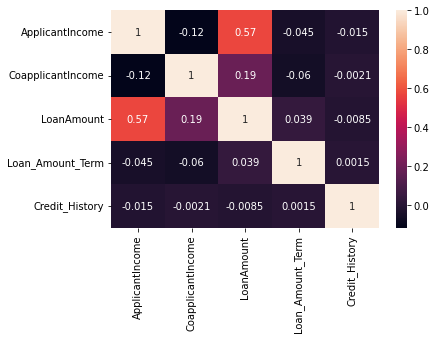

In [53]:
sns.heatmap(data.corr(),annot=True)

C:\Users\Shridhar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

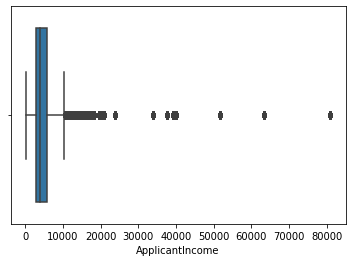

In [54]:
# Outliers

sns.boxplot(data['ApplicantIncome'])

<AxesSubplot:>

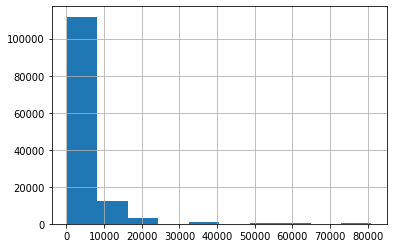

In [55]:
data['ApplicantIncome'].hist(bins=10)

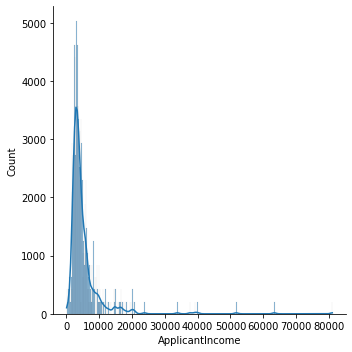

In [56]:
sns.displot(data['ApplicantIncome'],kde=True)

# 3 Feature Engg

In [57]:
data.isna().sum()/ data.shape[0] * 100

Loan_ID              0.000000
Gender               2.116661
Married              0.488998
Dependents           2.442659
Education            0.000000
Self_Employed        5.212093
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.582877
Loan_Amount_Term     2.281989
Credit_History       8.144526
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [58]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(),inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)


In [59]:
data.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,128835,128835,128835,128835,128835,128835,128835.000000,128835.000000,128835.000000,128835.000000,128835.000000,128835,128835
unique,128835,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,105334,84140,75546,100720,111630,NaN,NaN,NaN,NaN,NaN,48888,88550
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.796142,1620.920792,145.746420,342.414530,0.855063,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6105.683731,2921.223661,84.030119,64.370008,0.352039,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2876.000000,0.000000,100.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3813.000000,1167.000000,128.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5800.000000,2302.000000,165.000000,360.000000,1.000000,NaN,NaN


In [60]:
# Data Types 

In [61]:
data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [62]:
data['Gender'].replace({'Male':0,'Female':1}, inplace = True)


In [63]:
data['Married'].replace({'No':0,'Yes':1}, inplace = True)


In [64]:
data['Education'].replace({'Not Graduate':0,'Graduate':1}, inplace = True)
data['Self_Employed'].replace({'No':0,'Yes':1}, inplace = True)
data['Loan_Status'].replace({'N':0,'Y':1}, inplace = True)

In [65]:
data['Credit_History'].replace({'Yes':1}, inplace = True)

In [66]:
data['Dependents'].replace({'3+':3}, inplace = True)

In [67]:
d =  pd.get_dummies(data['Property_Area'],prefix='Property_Area',drop_first=True)
data = pd.concat([d,data],axis=1)

In [68]:
data.drop(columns = ['Loan_ID','Property_Area'], axis=1,inplace=True)

In [69]:
data['Dependents'] = data['Dependents'].astype(int)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128835 entries, 0 to 128834
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Property_Area_Semiurban  128835 non-null  uint8  
 1   Property_Area_Urban      128835 non-null  uint8  
 2   Gender                   128835 non-null  int64  
 3   Married                  128835 non-null  int64  
 4   Dependents               128835 non-null  int32  
 5   Education                128835 non-null  int64  
 6   Self_Employed            128835 non-null  int64  
 7   ApplicantIncome          128835 non-null  int64  
 8   CoapplicantIncome        128835 non-null  float64
 9   LoanAmount               128835 non-null  float64
 10  Loan_Amount_Term         128835 non-null  float64
 11  Credit_History           128835 non-null  float64
 12  Loan_Status              128835 non-null  int64  
dtypes: float64(4), int32(1), int64(6), uint8(2)
memory usage: 1

In [71]:
## Outlier Removal 

C:\Users\Shridhar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

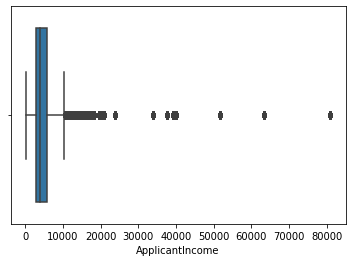

In [72]:
sns.boxplot(data['ApplicantIncome'])

In [73]:
data['ApplicantIncome'] = np.log(data['ApplicantIncome'])

<AxesSubplot:>

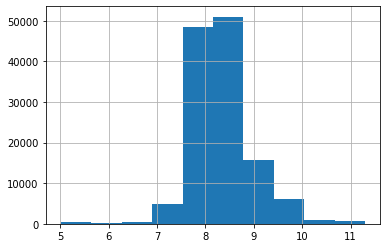

In [74]:
data['ApplicantIncome'].hist(bins=10)

In [75]:
firstQ = data['ApplicantIncome'].quantile(0.25)
firstQ

7.964155718840937

In [76]:
thirdQ = data['ApplicantIncome'].quantile(0.75)
thirdQ

8.66561319653451

In [77]:
IQR = thirdQ - firstQ
IQR

0.7014574776935731

In [78]:
lowertail = firstQ-(1.5*IQR) 
uppertail = thirdQ+(1.5*IQR)

In [83]:
d1= data['ApplicantIncome'].loc[(data['ApplicantIncome'] < uppertail) & (data['ApplicantIncome'] > lowertail)]


In [84]:
mean = d1.mean()
mean

8.299850409696623

In [85]:
data.loc[(data['ApplicantIncome']>uppertail) | (data['ApplicantIncome']<lowertail),'ApplicantIncome']=mean


In [90]:
m = MinMaxScaler()

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128835 entries, 0 to 128834
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Property_Area_Semiurban  128835 non-null  uint8  
 1   Property_Area_Urban      128835 non-null  uint8  
 2   Gender                   128835 non-null  int64  
 3   Married                  128835 non-null  int64  
 4   Dependents               128835 non-null  int32  
 5   Education                128835 non-null  int64  
 6   Self_Employed            128835 non-null  int64  
 7   ApplicantIncome          128835 non-null  float64
 8   CoapplicantIncome        128835 non-null  float64
 9   LoanAmount               128835 non-null  float64
 10  Loan_Amount_Term         128835 non-null  float64
 11  Credit_History           128835 non-null  float64
 12  Loan_Status              128835 non-null  int64  
dtypes: float64(5), int32(1), int64(5), uint8(2)
memory usage: 1

In [92]:
d2 = m.fit_transform(data)

In [93]:
data1 =pd.DataFrame(d2,columns=data.columns) 
data1

,Property_Area_Semiurban,Property_Area_Urban,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0.0,1.0,0.0,0.0,0.000000,1.0,0.0,0.626426,0.000000,0.172214,0.743590,1.0,1.0
1,0.0,0.0,0.0,1.0,0.333333,1.0,0.0,0.538692,0.036192,0.172214,0.743590,1.0,0.0
2,0.0,1.0,0.0,1.0,0.000000,1.0,1.0,0.386277,0.000000,0.082489,0.743590,1.0,1.0
3,0.0,1.0,0.0,1.0,0.000000,0.0,0.0,0.332445,0.056592,0.160637,0.743590,1.0,1.0
4,0.0,1.0,0.0,0.0,0.000000,1.0,0.0,0.635594,0.000000,0.191027,0.743590,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128830,1.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.472626,0.035592,0.166425,0.615385,1.0,1.0
128831,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.442749,0.105983,0.338640,0.743590,1.0,1.0
128832,0.0,1.0,0.0,1.0,0.000000,1.0,0.0,0.491839,0.160007,0.681621,0.743590,1.0,1.0
128833,0.0,1.0,0.0,0.0,0.000000,1.0,0.0,0.450153,0.000000,0.125904,0.743590,1.0,0.0


In [94]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128835 entries, 0 to 128834
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Property_Area_Semiurban  128835 non-null  float64
 1   Property_Area_Urban      128835 non-null  float64
 2   Gender                   128835 non-null  float64
 3   Married                  128835 non-null  float64
 4   Dependents               128835 non-null  float64
 5   Education                128835 non-null  float64
 6   Self_Employed            128835 non-null  float64
 7   ApplicantIncome          128835 non-null  float64
 8   CoapplicantIncome        128835 non-null  float64
 9   LoanAmount               128835 non-null  float64
 10  Loan_Amount_Term         128835 non-null  float64
 11  Credit_History           128835 non-null  float64
 12  Loan_Status              128835 non-null  float64
dtypes: float64(13)
memory usage: 12.8 MB


In [ ]:
# check 

In [95]:
data1['Loan_Status'].value_counts()

1.0    88550
0.0    40285
Name: Loan_Status, dtype: int64

In [96]:
data1['Loan_Status'].value_counts() / len(data1)*100

1.0    68.731323
0.0    31.268677
Name: Loan_Status, dtype: float64

<AxesSubplot:>

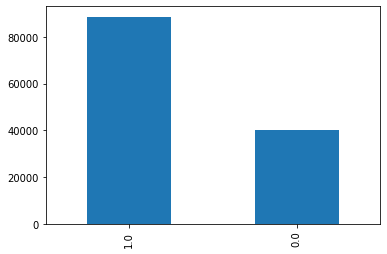

In [97]:
data1['Loan_Status'].value_counts().plot(kind='bar')

C:\Users\Shridhar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

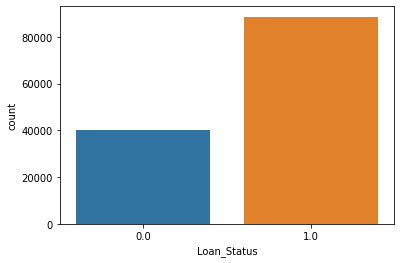

In [98]:
sns.countplot(data1['Loan_Status'])

In [100]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [101]:
sm = SMOTE()

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X = data1.drop(['Loan_Status'],axis=1)
y = data1['Loan_Status']

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify = y)

In [105]:
sm = SMOTE(random_state=10)

In [106]:
X_train_smote,y_train_smote = sm.fit_resample(X_train,y_train)

<AxesSubplot:>

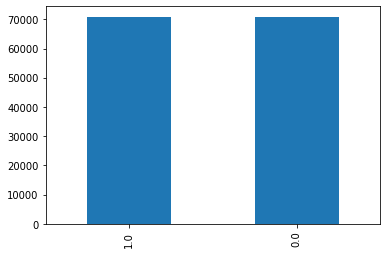

In [107]:
y_train_smote.value_counts().plot(kind='bar')

<AxesSubplot:>

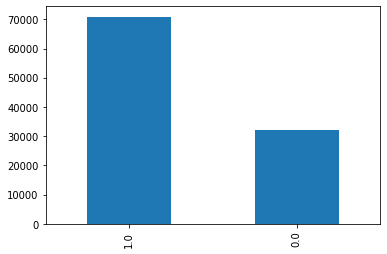

In [108]:
y_train.value_counts().plot(kind='bar')

In [109]:
oversample = RandomOverSampler(sampling_strategy='minority',random_state= 5)
# Increase minority class to match majority 

In [110]:
X_train_over,y_train_over = oversample.fit_resample(X_train,y_train)

<AxesSubplot:>

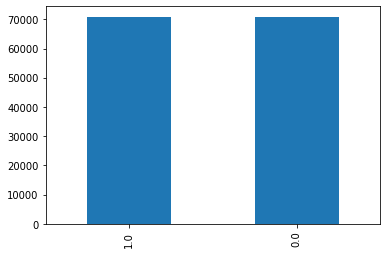

In [111]:
y_train_over.value_counts().plot(kind='bar')

In [112]:
oversample = RandomOverSampler(sampling_strategy=0.5,random_state= 5)
# Increase minority class to match majority 

In [113]:
X_train_over,y_train_over = oversample.fit_resample(X_train,y_train)

In [115]:
y_train_over.value_counts() / len(data1)*100

1.0    54.985058
0.0    27.492529
Name: Loan_Status, dtype: float64

In [130]:
under = RandomUnderSampler(sampling_strategy='majority',random_state= 5)
# Increase minority class to match majority 

In [131]:
X_train_under,y_train_under = under.fit_resample(X_train,y_train)

<AxesSubplot:>

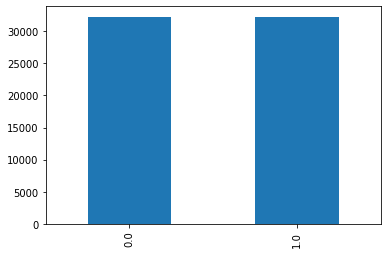

In [132]:
y_train_under.value_counts().plot(kind='bar')

In [ ]:
0 - 100 = 50 

0-20 = 12 
21-40 = 15
41-60 = 20
61-80 = 8
81-100 = 15

In [118]:
df = pd.read_csv(r'dataset\final_loan.csv')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128835 entries, 0 to 128834
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Loan_ID            128835 non-null  object 
 1   Gender             126108 non-null  object 
 2   Married            128205 non-null  object 
 3   Dependents         125688 non-null  object 
 4   Education          128835 non-null  object 
 5   Self_Employed      122120 non-null  object 
 6   ApplicantIncome    128835 non-null  int64  
 7   CoapplicantIncome  128835 non-null  float64
 8   LoanAmount         124219 non-null  float64
 9   Loan_Amount_Term   125895 non-null  float64
 10  Credit_History     118342 non-null  float64
 11  Property_Area      128835 non-null  object 
 12  Loan_Status        128835 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 12.8+ MB


In [121]:
df['ApplicantIncome'].describe()

count    128835.000000
mean       5403.796142
std        6105.683731
min         150.000000
25%        2876.000000
50%        3813.000000
75%        5800.000000
max       81000.000000
Name: ApplicantIncome, dtype: float64

In [125]:
pd.cut(df['ApplicantIncome'],bins=10).value_counts()

(69.15, 8235.0]       111837
(8235.0, 16320.0]      12382
(16320.0, 24405.0]      3146
(32490.0, 40575.0]       840
(48660.0, 56745.0]       210
(56745.0, 64830.0]       210
(72915.0, 81000.0]       210
(24405.0, 32490.0]         0
(40575.0, 48660.0]         0
(64830.0, 72915.0]         0
Name: ApplicantIncome, dtype: int64

In [124]:
df['ApplicantIncome'].head(20)

0      5849
1      4583
2      3000
3      2583
4      6000
5      5417
6      2333
7      3036
8      4006
9     12841
10     3200
11     2500
12     3073
13     1853
14     1299
15     4950
16     3596
17     3510
18     4887
19     2600
Name: ApplicantIncome, dtype: int64

In [126]:
# Model training on imbalnace data 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [127]:
## imbalnce data 
logreg = LogisticRegression()
model = logreg.fit(X_train,y_train)
y_pred_logreg = model.predict(X_test)
f1_score(y_test,y_pred_logreg)

0.8787672442056947

In [128]:
## balance data 
logreg = LogisticRegression()
model = logreg.fit(X_train_smote,y_train_smote)
y_pred_logreg = model.predict(X_test)
f1_score(y_test,y_pred_logreg)

0.8426527958387516

In [129]:
## oversampled balance data 
logreg = LogisticRegression()
model = logreg.fit(X_train_over,y_train_over)
y_pred_logreg = model.predict(X_test)
f1_score(y_test,y_pred_logreg)

0.8787672442056947

In [133]:
## under sampled balance data 
logreg = LogisticRegression()
model = logreg.fit(X_train_under,y_train_under)
y_pred_logreg = model.predict(X_test)
f1_score(y_test,y_pred_logreg)

0.8460625674217908

# 5. Feature Selection 

In [134]:
# 1. corrleation

In [135]:
data1.corr()

,Property_Area_Semiurban,Property_Area_Urban,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Property_Area_Semiurban,1.000000,-0.547617,0.108530,0.005950,0.001955,0.039484,0.008669,-0.007900,-0.026850,-0.005784,0.059147,0.036063,0.136691
Property_Area_Urban,-0.547617,1.000000,-0.034554,0.000538,-0.001203,0.034195,-0.030262,-0.043596,0.022537,-0.036099,-0.094369,-0.016978,-0.043708
Gender,0.108530,-0.034554,1.000000,-0.364623,-0.172926,0.045376,0.000509,-0.049900,-0.083139,-0.107010,0.074038,-0.009182,-0.018016
Married,0.005950,0.000538,-0.364623,1.000000,0.334223,-0.012379,0.004444,-0.003176,0.076245,0.146484,-0.100929,0.010979,0.091437
Dependents,0.001955,-0.001203,-0.172926,0.334223,1.000000,-0.055947,0.056648,0.117933,0.030410,0.163037,-0.103921,-0.040235,0.010066
Education,0.039484,0.034195,0.045376,-0.012379,-0.055947,1.000000,0.010362,0.195346,0.062265,0.168746,0.074047,0.073777,0.085929
Self_Employed,0.008669,-0.030262,0.000509,0.004444,0.056648,0.010362,1.000000,0.203999,-0.015970,0.114856,-0.033847,-0.001514,-0.003703
ApplicantIncome,-0.007900,-0.043596,-0.049900,-0.003176,0.117933,0.195346,0.203999,1.000000,-0.157515,0.380576,-0.029865,0.033095,-0.010060
CoapplicantIncome,-0.026850,0.022537,-0.083139,0.076245,0.030410,0.062265,-0.015970,-0.157515,1.000000,0.189302,-0.059167,0.011050,-0.059005
LoanAmount,-0.005784,-0.036099,-0.107010,0.146484,0.163037,0.168746,0.114856,0.380576,0.189302,1.000000,0.036927,-0.000685,-0.033333


<AxesSubplot:>

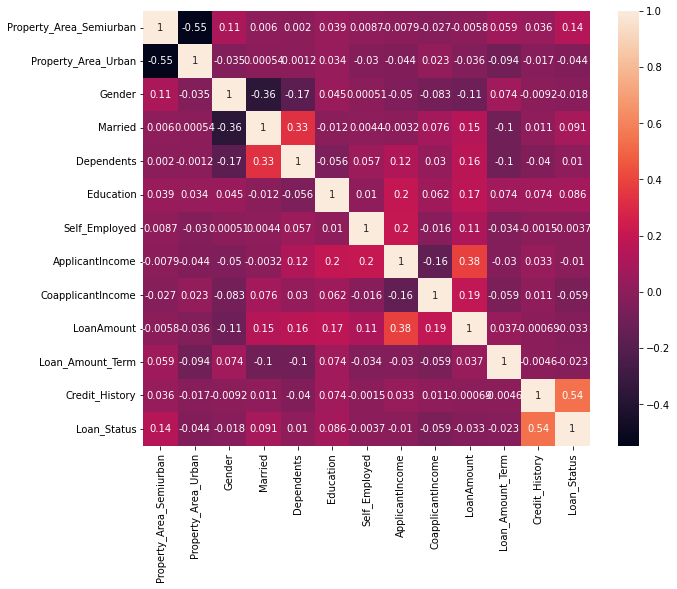

In [139]:
plt.figure(figsize=(10,8))
sns.heatmap(data1.corr(),annot = True)

C:\Users\Shridhar\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


<AxesSubplot:>

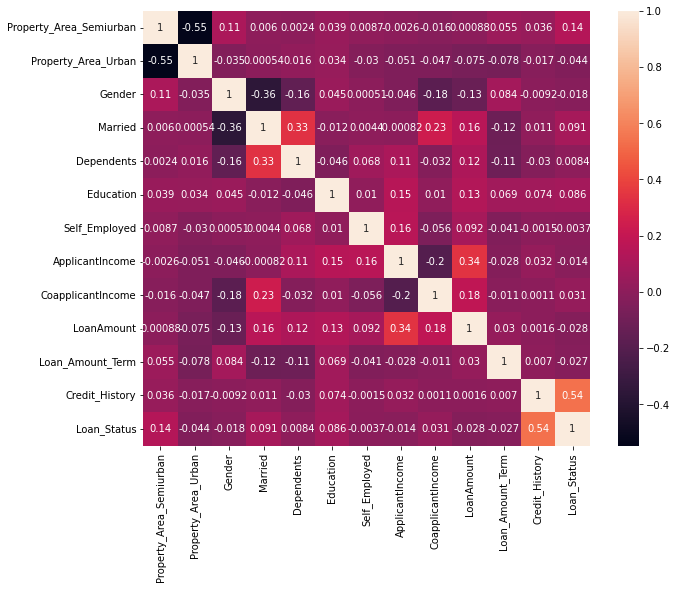

In [140]:
plt.figure(figsize=(10,8))
sns.heatmap(data1.corr(method='kendall'),annot = True)

In [141]:
# infomation gain

In [142]:
from sklearn.feature_selection import mutual_info_classif

In [143]:
feat = mutual_info_classif(X,y)

In [144]:
feat

array([1.42673121e-02, 6.95899886e-05, 2.29576021e-03, 1.35271257e-02,
       2.45785173e-03, 1.39738675e-02, 0.00000000e+00, 4.87629909e-01,
       2.89064563e-01, 2.03816386e-01, 2.16033553e-02, 1.58802027e-01])

In [145]:
feat_se = pd.Series(feat)
feat_se

0     0.014267
1     0.000070
2     0.002296
3     0.013527
4     0.002458
5     0.013974
6     0.000000
7     0.487630
8     0.289065
9     0.203816
10    0.021603
11    0.158802
dtype: float64

In [146]:
feat_se.index = X.columns

<AxesSubplot:>

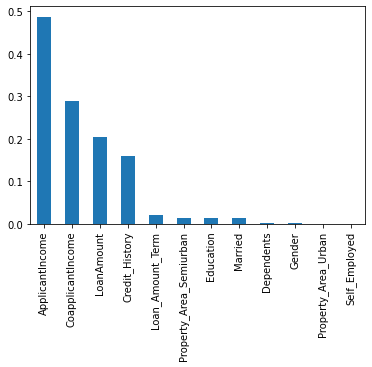

In [152]:
feat_se.sort_values(ascending=False).plot(kind='bar')

In [ ]:
X1 = data1['ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History']

In [153]:
#  forward selection 

In [156]:
from sklearn.feature_selection import SequentialFeatureSelector

In [158]:
sf = SequentialFeatureSelector(logreg, n_features_to_select = 7, direction = 'forward',cv=5)

In [162]:
%time sf.fit(X,y)

Wall time: 0 ns


SequentialFeatureSelector(estimator=LogisticRegression(),
                          n_features_to_select=5)

In [163]:
sf.support_

array([ True,  True,  True, False, False, False, False, False,  True,
       False, False,  True])

In [161]:
data1.columns

Index(['Property_Area_Semiurban', 'Property_Area_Urban', 'Gender', 'Married',
       'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status'],
      dtype='object')

In [164]:
sf = SequentialFeatureSelector(logreg, n_features_to_select = 10, direction = 'backward',cv=5)
%time sf.fit(X,y)
sf.support_

Wall time: 50.4 s


array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [165]:
# Model Training

In [167]:
# 1. Logistic Regression 
## balance data 
logreg = LogisticRegression()
model = logreg.fit(X_train_smote,y_train_smote)
y_pred_logreg = model.predict(X_test)
f1_score_logreg = f1_score(y_test,y_pred_logreg)
f1_score_logreg

0.8426527958387516

In [213]:
columns = X_train_smote.columns
columns[]

'Property_Area_Semiurban'

In [206]:
import json

In [214]:
with open('columns.json','w') as file:
    json.dump(columns,file)

In [215]:
import json
columns = [col_name.lower() for col_name in X_train_smote.columns]
data = {'Columns': columns}
with open("x_columns.json","w") as f:
    f.write(json.dumps(data))

In [168]:
# 2. Decision Tree 

In [169]:
from sklearn.tree import DecisionTreeClassifier

In [170]:
tree_clf = DecisionTreeClassifier()
tree_model = tree_clf.fit(X_train_smote,y_train_smote)
y_pred_tree_clf = tree_model.predict(X_test)
f1_score_tree_clf = f1_score(y_test,y_pred_tree_clf)
f1_score_tree_clf

1.0

In [171]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [187]:
hyperparameter = {
                    'min_samples_leaf':np.arange(2,5),
                    'min_samples_split':np.arange(2,5),
                    'max_depth':np.arange(5,20),
                    'criterion': ['gini','entropy']
                    }

In [188]:
grid_tree_clf = GridSearchCV(tree_clf,hyperparameter,cv=5,n_jobs=-1)
grid_tree_clf.fit(X_train_smote,y_train_smote)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'min_samples_leaf': array([2, 3, 4]),
                         'min_samples_split': array([2, 3, 4])})

In [190]:
grid_tree_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 19,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [191]:
tree_clf_hyper = DecisionTreeClassifier(criterion='entropy',max_depth=19,min_samples_leaf=2,min_samples_split=2)
tree_model_hyper = tree_clf_hyper.fit(X_train_smote,y_train_smote)
y_pred_tree_clf_hyper = tree_model_hyper.predict(X_test)
f1_score_tree_clf_hyper = f1_score(y_test,y_pred_tree_clf_hyper)
f1_score_tree_clf_hyper

1.0

In [192]:
from sklearn.ensemble import AdaBoostClassifier

In [193]:
adboost = AdaBoostClassifier()

In [194]:
adaboost_model = adboost.fit(X_train_smote,y_train_smote)


In [195]:
y_pred_ada = adaboost_model.predict(X_test)

In [196]:
f1_score_adaboost = f1_score(y_test,y_pred_ada)
f1_score_adaboost

0.8788368336025848

In [197]:
from xgboost import XGBClassifier,XGB

In [199]:
%%time
xgb= XGBClassifier(n_estimators = 10)
xgb.fit(X_train_smote,y_train_smote)

C:\Users\Shridhar\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:54:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 868 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [200]:
f1_score_xgb = f1_score(y_test,y_pred_ada)
f1_score_xgb

0.8788368336025848

In [201]:
print(f"ADABOOST: {f1_score_adaboost}")
print(f"Logistic : {f1_score_logreg}")
print(f"DT: {f1_score_tree_clf}")
print(f"XGBOOST : {f1_score_xgb}")




ADABOOST: 0.8788368336025848
Logistic : 0.8426527958387516
DT: 1.0
XGBOOST : 0.8788368336025848


In [202]:
import pickle 

In [204]:
model = pickle.dump(logreg,open('model.pkl','wb'))